In [3]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup
import requests

In [206]:
url = 'https://www.mudah.my/Malaysia/Properties-for-sale-2000?q=&th=1&o='

house_name=[]
house_price=[]
house_type=[]
house_size=[]
house_loc=[]
post_date=[]
for page in range(1,40):
    url_page = url + str(page)
    scrape = requests.get(url_page)
    soup = BeautifulSoup(scrape.content, 'lxml')
    
    #find top part of the web scrapping content
    top = soup.find_all('div', {'class':'listing_params_container ', 'class':'top_params barca', 'class':'top_params_col1'})
    #find middle part of the web scrapping content
    mid = soup.find_all('div', {'class':'listing_params_container ', 'class':'middle_params barca', 'class':'holder-left ', 'class':'adjust-margin'})
    #find right part of the web scrapping content
    right = soup.find_all('div', {'class':'listing_params_container ', 'class':'top_params barca', 'class':'top_params_col2', 'class':'location bottom_info'})
    
    length = len(top)
    for i in range(0,length):
        house_name.append(top[i].h2.a.string)
        house_price.append(top[i].div.div.string)
        house_type.append(mid[i].div.div.find_next_sibling('div').string)
        house_size.append(mid[i].div.find_next_sibling('div').div.find_next_sibling('div').string)
        house_loc.append(right[i].find(class_='area').string)
        post_date.append(right[i].div.string)


In [207]:
df = pd.DataFrame({'name':house_name, 'price(RM)':house_price, 'type': house_type, 'size(sq.ft)': house_size, 'location': house_loc, 'date_post': post_date})
df['price(RM)'] = df['price(RM)'].fillna('').apply(lambda x: re.sub(r'\s', '', x)).apply(lambda x: x.strip('RM'))
df['price(RM)'] = df['price(RM)'].apply(pd.to_numeric, errors='coerce')
df['size(sq.ft)'] = df['size(sq.ft)'].fillna('').apply(lambda x: re.sub(r'\s', '', x)).apply(lambda x: x.strip(' sq.ft'))
df['size(sq.ft)'] = df['size(sq.ft)'].apply(pd.to_numeric, errors='coerce')
df['location'] = df['location'].fillna('').apply(lambda x: re.sub(r'\s', '', x))
df['type'] = df['type'].fillna('').apply(lambda x: re.sub(r'\s', '', x))

df['date_post'] = str(pd.datetime.now().date()) + ' ' + df['date_post'].fillna('').apply(lambda x: re.sub(r'Today,', '', x))
df['date_post'] = df['date_post'].apply(pd.to_datetime, errors='coerce')
#exclude lands
df1 = df[df['type'] != 'Land']
df1



,date_post,location,name,price(RM),size(sq.ft),type
0,2017-12-08 19:58:00,Selangor,Puchong Taman Putra Prima Shop Office,1300000.0,1650.0,Commercial
1,2017-12-08 19:58:00,Sarawak,"Semi D Joyous Park ,9mile",400000.0,1.0,Houses
2,2017-12-08 19:57:00,Sarawak,"Single storey intermediate Everbright Estate, ...",280000.0,1.0,Houses
3,2017-12-08 19:56:00,Selangor,"Tiara intan condominium, bukit indah, ampang",350000.0,908.0,Apartments
4,2017-12-08 19:56:00,Sarawak,"2nd floor Vista Ilmu , nearby unimas &uitm",165000.0,750.0,Apartments
5,2017-12-08 19:54:00,Sarawak,"New Single Storey Intermediate Taman Sinai , 1...",318000.0,1.0,Houses
6,2017-12-08 19:54:00,Sarawak,"Double Storey Jalan Kapor, Setapak (Renovated)",430000.0,1.0,Houses
7,2017-12-08 19:54:00,Selangor,"Apartment Seri Cempaka, Bangi TINGKAT 2",165000.0,650.0,Apartments
8,2017-12-08 19:51:00,Selangor,Apartmen putra kajang ( sebelah tol Kajang SILK ),195000.0,850.0,Apartments
9,2017-12-08 19:50:00,Johor,Teres Satu Tingkat Taman Mengkibol Kluang,200000.0,1400.0,Houses


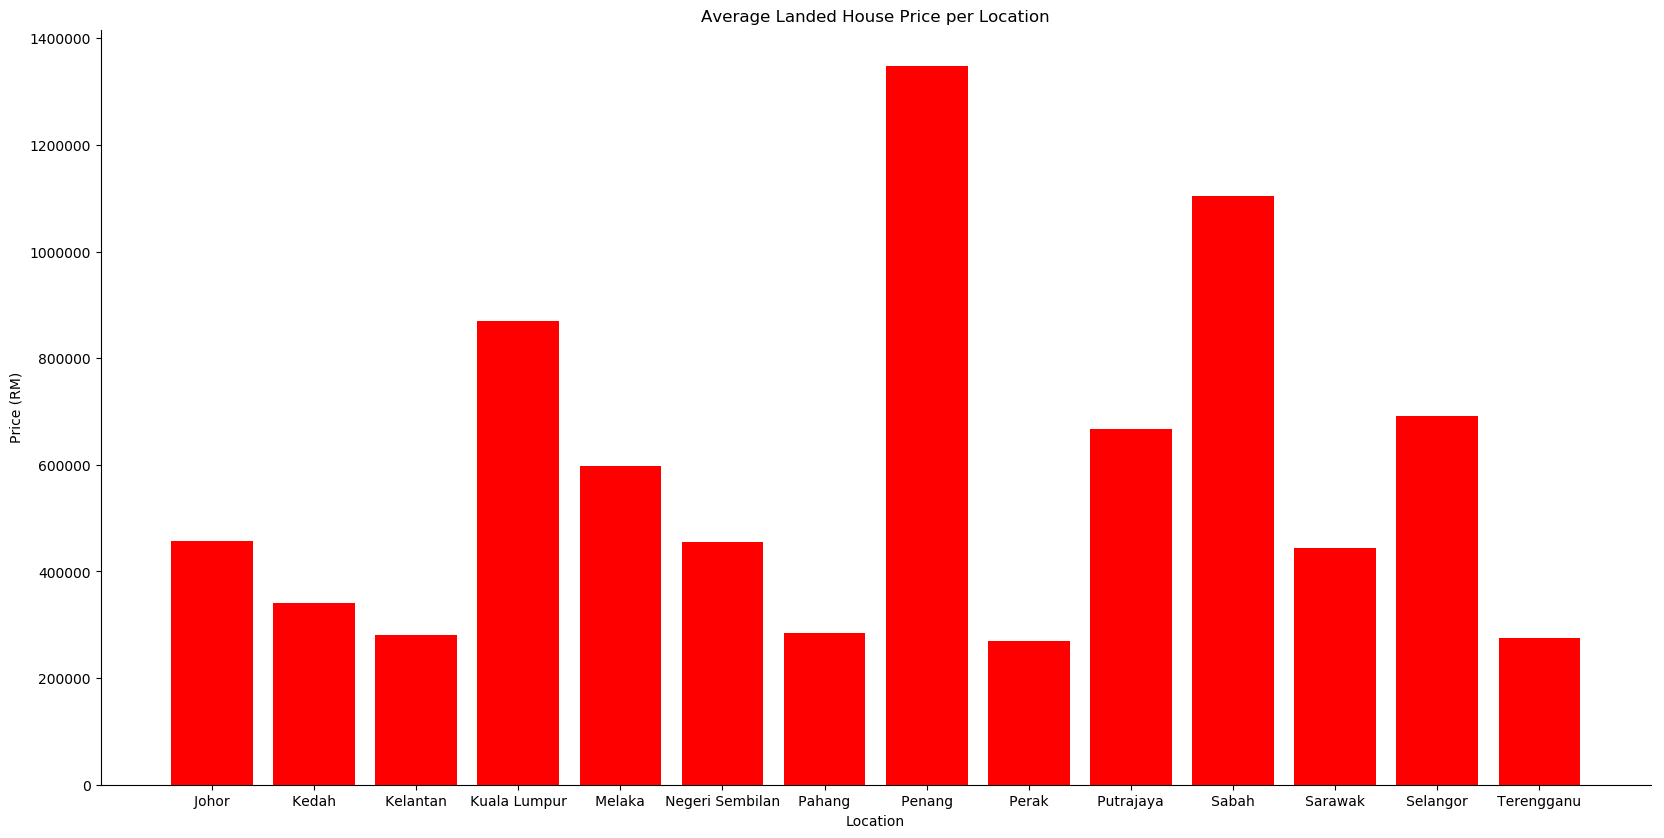

In [171]:
#average landed house price per location
df2 = df1[df1['type'] == 'Houses']
df_avg_loc_hse = df2.groupby(['location'])[['price(RM)']].mean().sort_values(['price(RM)'], ascending=False)
df_avg_loc_hse

fig = plt.figure()
fig, ax = plt.subplots(figsize=(20,10), dpi=100)
plt.bar(df_avg_loc_hse.index,df_avg_loc_hse['price(RM)'],color="red")

plt.title('Average Landed House Price per Location')
plt.xlabel('Location')
plt.ylabel('Price (RM)')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

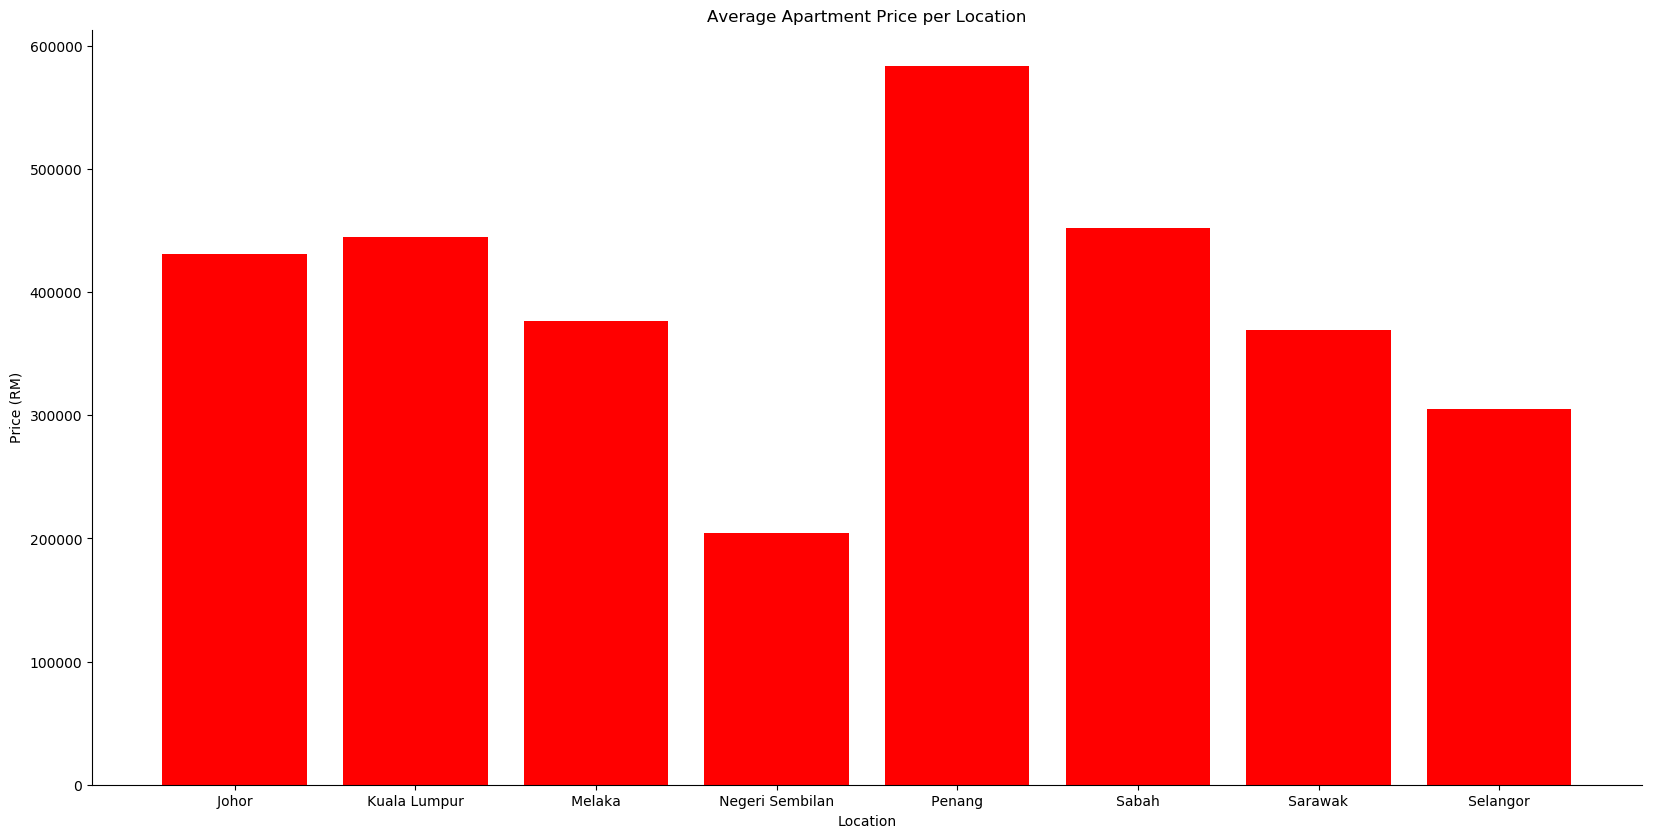

In [173]:
#average Apartments price per location
df3= df1[df1['type'] == 'Apartments']
df_avg_loc_aprt = df3.groupby(['location'])[['price(RM)']].mean().sort_values(['price(RM)'], ascending=False)
df_avg_loc_aprt

fig = plt.figure()
fig, ax = plt.subplots(figsize=(20,10), dpi=100)
plt.bar(df_avg_loc_aprt.index,df_avg_loc_aprt['price(RM)'],color="red")

plt.title('Average Apartment Price per Location')
plt.xlabel('Location')
plt.ylabel('Price (RM)')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

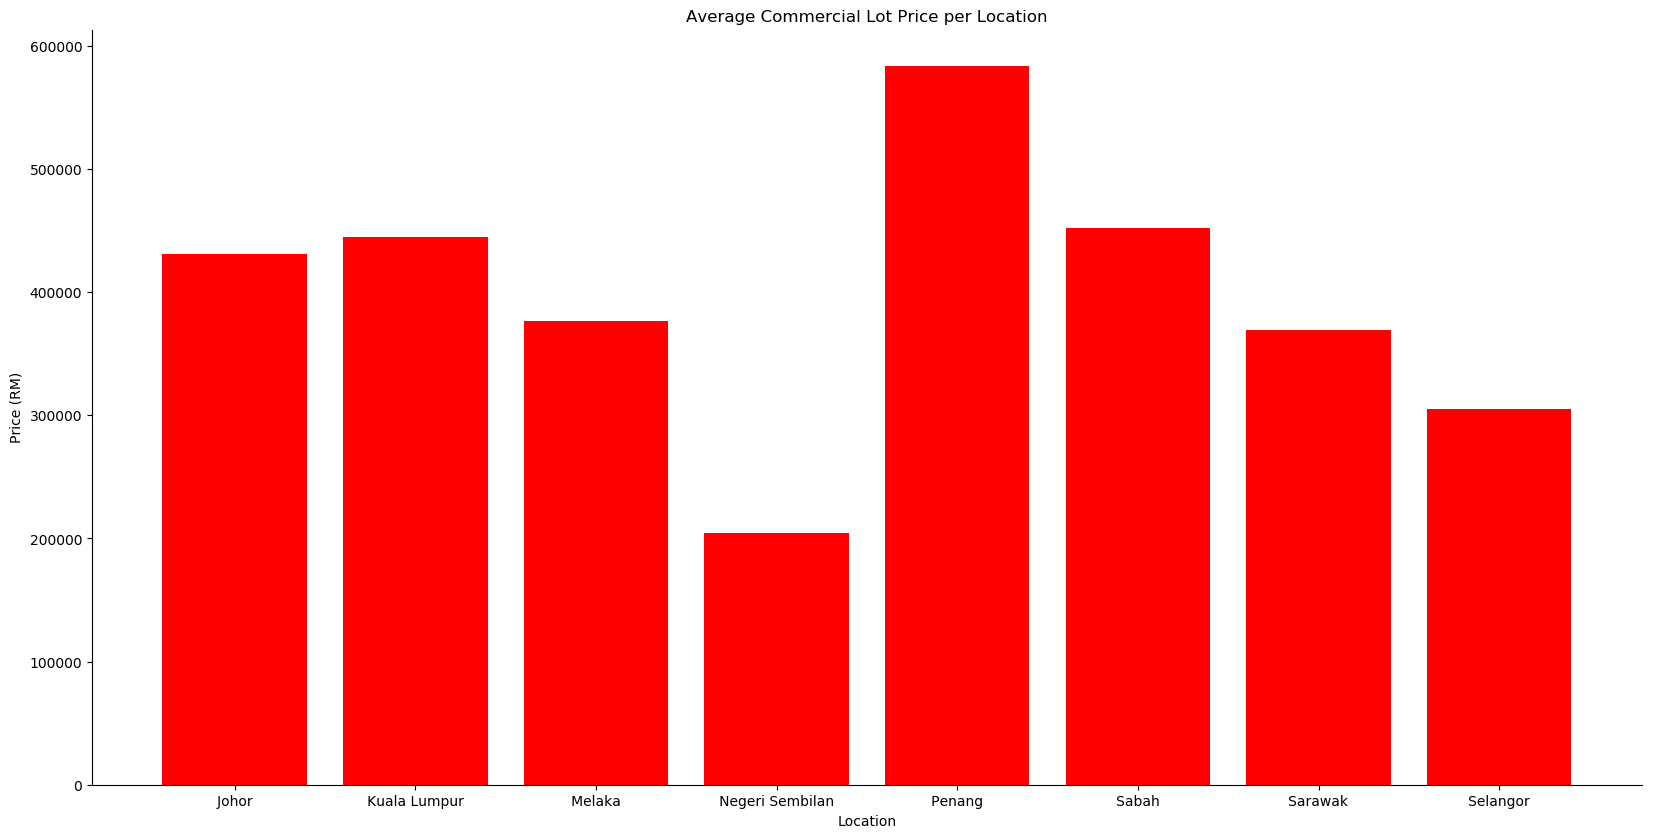

In [174]:
#average Commercial Lot price per location
df4= df1[df1['type'] == 'Apartments']
df_avg_loc_com = df4.groupby(['location'])[['price(RM)']].mean().sort_values(['price(RM)'], ascending=False)
df_avg_loc_com

fig = plt.figure()
fig, ax = plt.subplots(figsize=(20,10), dpi=100)
plt.bar(df_avg_loc_com.index,df_avg_loc_com['price(RM)'],color="red")

plt.title('Average Commercial Lot Price per Location')
plt.xlabel('Location')
plt.ylabel('Price (RM)')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

In [179]:
df1.groupby(['location', 'type'])[['price(RM)']].mean()

price(RM)
location              type                    
   Johor              Apartments  4.311429e+05
                      Commercial  5.400000e+05
                      Houses      4.562267e+05
   Kedah              Commercial  1.300000e+05
                      Houses      3.400000e+05
   Kelantan           Houses      2.808571e+05
   Kuala Lumpur       Apartments  4.447386e+05
                      Commercial  3.912857e+06
                      Houses      8.697530e+05
   Melaka             Apartments  3.765000e+05
                      Commercial  6.860000e+05
                      Houses      5.979455e+05
   Negeri Sembilan    Apartments  2.044000e+05
                      Commercial  6.500000e+05
                      Houses      4.557396e+05
   Pahang             Commercial  1.200000e+07
                      Houses      2.850000e+05
   Penang             Apartments  5.840091e+05
                      Commercial  3.295000e+05
                      Houses      1.348721e+06
   Perak              Commercial  8.000000e+05
                      Houses      2.686877e+05
   Putrajaya          Houses      6.666667e+05
   Sabah              Apartments  4.523778e+05
                      Commercial           NaN
                      Houses      1.103500e+06
   Sarawak            Apartments  3.694286e+05
                      Commercial  6.365000e+06
                      Houses      4.439474e+05
   Selangor           Apartments  3.053411e+05
                      Commercial  5.057417e+06
                      Houses      6.924233e+05
   Terengganu         Commercial  1.850000e+05
                      Houses      2.750000e+05

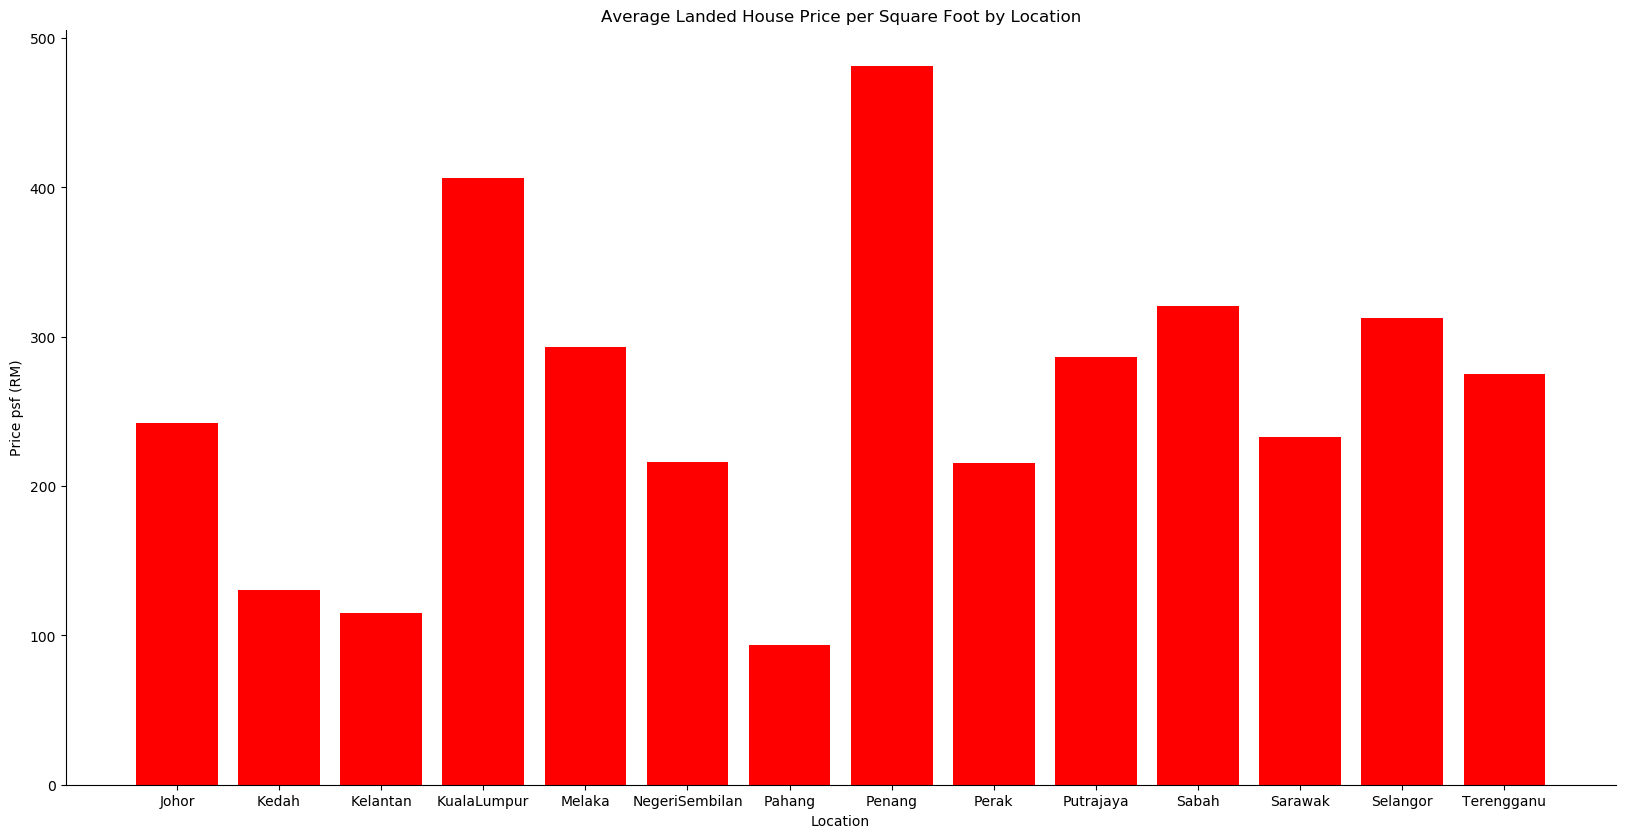

In [200]:
#average price psf for landed house by location
df2 = df1[df1['type'] == 'Houses']
df2 = df2[df2['size(sq.ft)'] > 100]
df2
df2['price(psf)'] = df2['price(RM)'] / df2['size(sq.ft)'] 
df_avg_loc_hse_psf = df2.groupby(['location'])[['price(psf)']].mean().sort_values(['price(psf)'], ascending=False)
df_avg_loc_hse_psf

fig = plt.figure()
fig, ax = plt.subplots(figsize=(20,10), dpi=100)
plt.bar(df_avg_loc_hse_psf.index,df_avg_loc_hse_psf['price(psf)'],color="red")

plt.title('Average Landed House Price per Square Foot by Location')
plt.xlabel('Location')
plt.ylabel('Price psf (RM)')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')


